# Stock Market Explanatory Data Analysis

<img src="https://images.unsplash.com/photo-1589652717406-1c69efaf1ff8?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1650&q=80" style="height:300px" />

 #### Objective of the Project
<div align="left"> The objective of this data analytics project is to comprehensively analyze and derive actionable insights from the stock market data of leading technology companies, namely Amazon, Google, Apple, Microsoft, and Meta between 2000 and 2022. The primary goal is to provide stakeholders, investors, and decision-makers with a thorough understanding of the market dynamics, key trends, and performance indicators associated with these tech giants during the specified timeframe. Exploratory Data Analysis (EDA) is integral to the success of data analytics projects, encompassing the exploration and visualization of datasets to succinctly capture their primary features. This process frequently employs statistical graphics and various data visualization techniques.</div>


<b><div align="left"> Here are the questions we'll try to answer:.</b></div>
<ul>1. What was the change in a stock's price over time? </ul>
<ul>2. What was the daily return average of a stock? </ul>
<ul>3. What was the moving average of various stocks? </ul>
<ul>4. What was the correlation between daily returns of different stocks? </ul>
<ul>5. How can we attempt to predict future stock behaviour? </ul>

 #### Dataset
<div align="left"> We will get stock market datafor the following technology companies from S&P 500 using Yahoo Finance API.</div>
<ul>Google : GOOGL </ul>
<ul>Apple : AAPL </ul>
<ul>Microsoft : MSFT </ul>
<ul>Amazon : AMZN </ul>
<ul>Meta : META </ul>

### 0. Importing the neccessary libraries

In [9]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


### 1. Data Exploring

In [17]:
# Defining the list of stock tickers
stock_tickers = ['AMZN', 'AAPL', 'MSFT', 'GOOGL', 'META']

# Define the date range
start_date = '2000-01-01'
end_date = '2022-12-31'

# Fetch stock data
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data.head()

# View the data types and non null value in the dataset
stock_data.info()

stock_data.describe()

[*********************100%%**********************]  5 of 5 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2000-01-03 to 2022-12-30
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   5787 non-null   float64
 1   (Adj Close, AMZN)   5787 non-null   float64
 2   (Adj Close, GOOGL)  4625 non-null   float64
 3   (Adj Close, META)   2673 non-null   float64
 4   (Adj Close, MSFT)   5787 non-null   float64
 5   (Close, AAPL)       5787 non-null   float64
 6   (Close, AMZN)       5787 non-null   float64
 7   (Close, GOOGL)      4625 non-null   float64
 8   (Close, META)       2673 non-null   float64
 9   (Close, MSFT)       5787 non-null   float64
 10  (High, AAPL)        5787 non-null   float64
 11  (High, AMZN)        5787 non-null   float64
 12  (High, GOOGL)       4625 non-null   float64
 13  (High, META)        2673 non-null   float64
 14  (High, MSFT)     

Adj Close                                                      \
              AAPL         AMZN        GOOGL         META         MSFT   
count  5787.000000  5787.000000  4625.000000  2673.000000  5787.000000   
mean     28.610886    34.303404    37.761284   147.991912    61.646535   
std      42.794138    49.417387    34.991820    86.999128    76.390830   
min       0.198599     0.298500     2.502753    17.730000    11.304626   
25%       1.585010     2.200250    12.643644    77.830002    18.917685   
50%      10.813971     9.294500    25.107609   142.279999    22.876787   
75%      33.138041    44.451250    54.063000   191.289993    60.103102   
max     179.953903   186.570496   149.838501   382.179993   336.937225   

             Close                                                      ...  \
              AAPL         AMZN        GOOGL         META         MSFT  ...   
count  5787.000000  5787.000000  4625.000000  2673.000000  5787.000000  ...   
mean     29.956205    34.303404    37.761284   147.991912    68.863859  ...   
std      43.170829    49.417387    34.991820    86.999128    75.413329  ...   
min       0.234286     0.298500     2.502753    17.730000    15.150000  ...   
25%       1.869821     2.200250    12.643644    77.830002    26.950001  ...   
50%      12.757143     9.294500    25.107609   142.279999    31.540001  ...   
75%      35.453751    44.451250    54.063000   191.289993    65.475002  ...   
max     182.009995   186.570496   149.838501   382.179993   343.109985  ...   

              Open                                                      \
              AAPL         AMZN        GOOGL         META         MSFT   
count  5787.000000  5787.000000  4625.000000  2673.000000  5787.000000   
mean     29.943464    34.320055    37.763303   147.961691    68.852509   
std      43.146271    49.460147    34.995270    86.969082    75.401777   
min       0.231964     0.295500     2.482232    18.080000    15.200000   
25%       1.864821     2.196000    12.659910    77.800003    26.940001   
50%      12.763929     9.288500    25.050051   142.259995    31.500000   
75%      35.473751    44.387501    54.073002   191.360001    65.404999   
max     182.630005   187.199997   151.250000   381.679993   344.619995   

             Volume                                                          
               AAPL          AMZN         GOOGL          META          MSFT  
count  5.787000e+03  5.787000e+03  4.625000e+03  2.673000e+03  5.787000e+03  
mean   4.143518e+08  1.244534e+08  1.248883e+08  3.120245e+07  5.223922e+07  
std    3.870975e+08  9.940044e+07  1.517827e+08  2.720500e+07  3.091925e+07  
min    3.519590e+07  1.762600e+07  9.312000e+06  5.913100e+06  7.425600e+06  
25%    1.421488e+08  6.833700e+07  3.305000e+07  1.618930e+07  2.973235e+07  
50%    2.981384e+08  1.021460e+08  7.031761e+07  2.321740e+07  4.725520e+07  
75%    5.507012e+08  1.482330e+08  1.539179e+08  3.616910e+07  6.585185e+07  
max    7.421641e+09  2.086584e+09  1.643023e+09  5.735764e+08  5.910522e+08  

[8 rows x 30 columns]

### 2. Data Cleaning

In [ ]:
# Convert the date column into datetime format

# Remove duplicates
stock_data.drop(['High', 'Low', 'Volume'], axis=1, inplace=True)
# Handle outliers
q1 = stock_data['Close'].quantile(0.25)
q3 = stock_data['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
stock_data = stock_data[stock_data['Close'] <= upper_bound]

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stock_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume']])

### 3. Data Visualisation and Analysis

#### 3.1 Stock Price over time

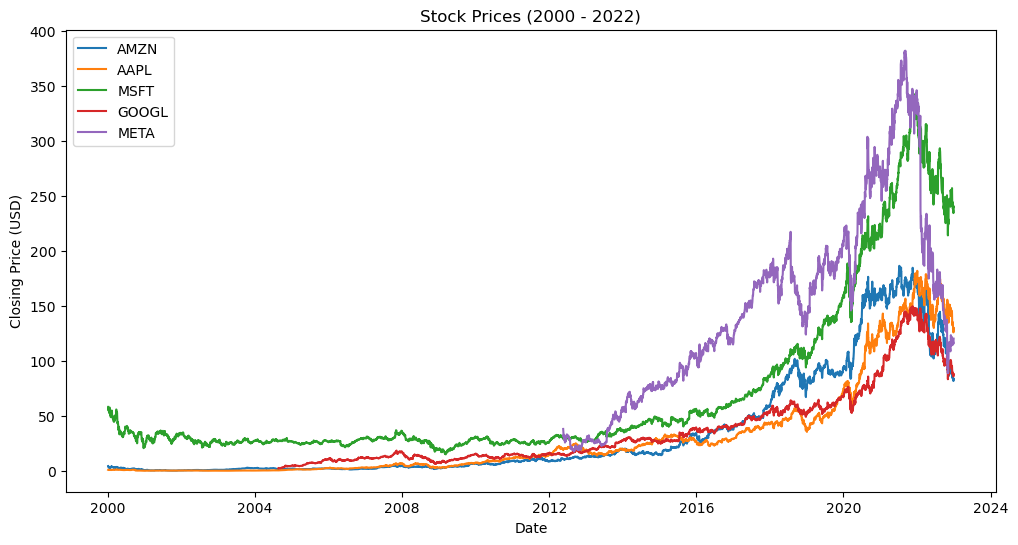

In [18]:
# Plot closing prices for each stock
plt.figure(figsize=(12, 6))
for ticker in stock_tickers:
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=ticker)

plt.title('Stock Prices (2000 - 2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

#### 3.2 Daily Returns

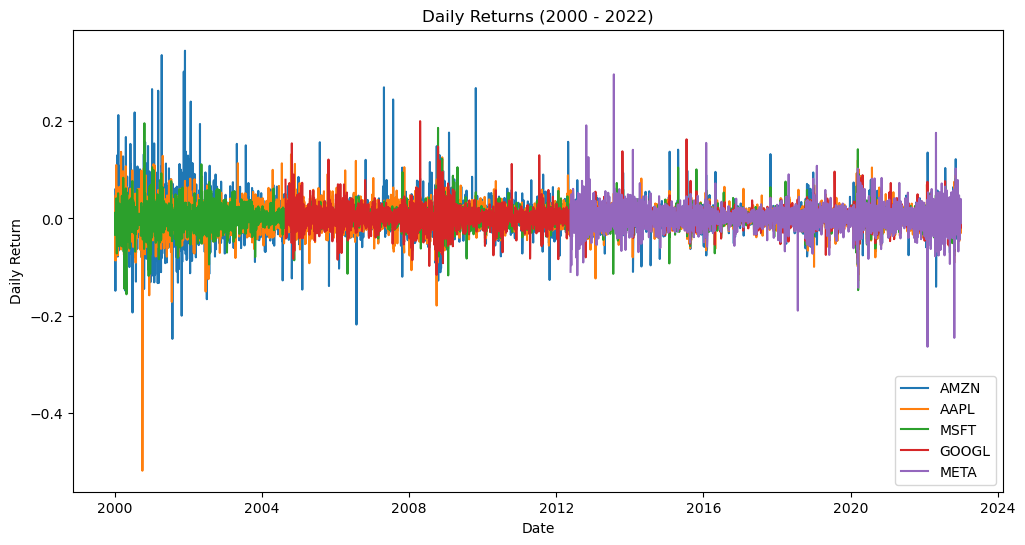

In [19]:
# Calculate and plot the daily returns for each stock. This helps in understanding the volatility of each stock.
# Calculating the daily returns
daily_returns = stock_data['Close'].pct_change()
# Plot daily returns
plt.figure(figsize=(12, 6))
for ticker in stock_tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

plt.title('Daily Returns (2000 - 2022)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

#### 3.3 Moving Averages

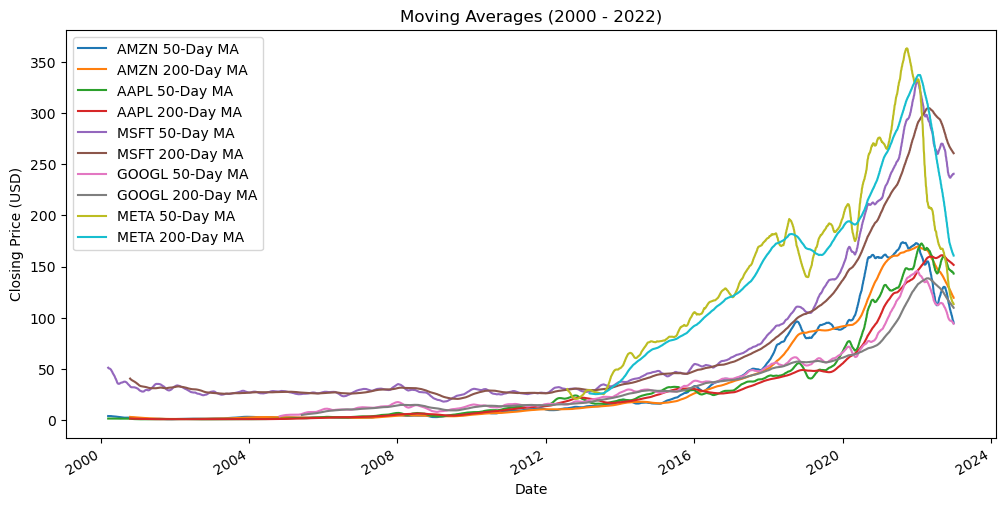

In [20]:
# Plot the moving averages for each stock. Moving averages can help identify trends and smooth out short-term fluctuations
# Explain why moving averages are important and what do they mean
# Calculate and plot 50-day and 200-day moving averages
plt.figure(figsize=(12, 6))
for ticker in stock_tickers:
    stock_data['Close'][ticker].rolling(window=50).mean().plot(label=f'{ticker} 50-Day MA')
    stock_data['Close'][ticker].rolling(window=200).mean().plot(label=f'{ticker} 200-Day MA')

plt.title('Moving Averages (2000 - 2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

#### 3.4 Correlation between daily returns of different stocks

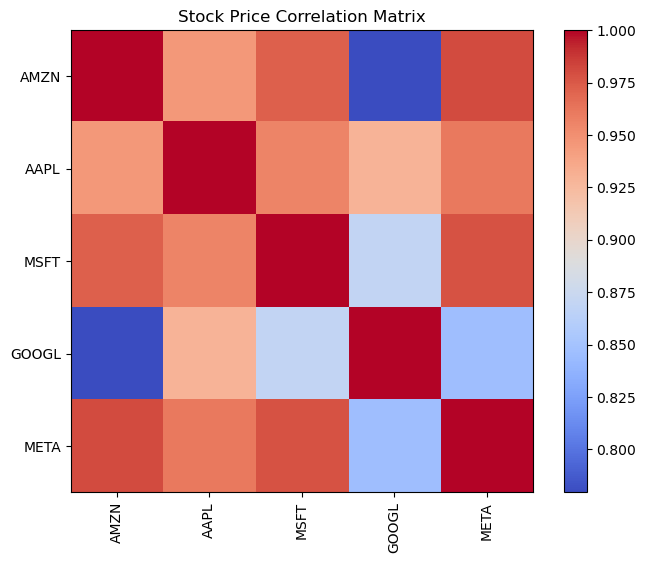

In [21]:
# What is meaning behind the correlation
# visualize the correlation matrix to understand how closely the stock prices are related to each other.
# Calculate and plot the correlation matrix
correlation_matrix = stock_data['Close'].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(stock_tickers)), stock_tickers, rotation=90)
plt.yticks(range(len(stock_tickers)), stock_tickers)
plt.title('Stock Price Correlation Matrix')
plt.show()